In [1]:
import numpy as np
import pandas as pd
from sail.pipeline import SAILPipeline
from sail.models.keras import KerasSequentialClassifier
from sklearn.impute import SimpleImputer
from sail.transformers.river.preprocessing import StandardScaler

#### Load Data


In [2]:
X = pd.read_csv("../datasets/agrawal.csv").head(5000)

y = X["class"]
X.drop("class", axis=1, inplace=True)

#### Model Definition


In [3]:
model = KerasSequentialClassifier(
    num_hidden_nodes= [10],
    hidden_layer_activation= ["relu"],
    num_output_nodes= 1,
    outer_layer_activation="sigmoid"
)

#### Create SAIL Pipeline


In [4]:
steps = [
    ("Imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
    ("standard_scalar", StandardScaler()),
    ("classifier", model),
]
sail_pipeline = SAILPipeline(steps=steps, scoring="Accuracy", verbosity_level=1, verbosity_interval=50)

#### Start Incremental Training


In [5]:
y_preds = []
y_true = []
batch_size = 1
for start in range(0, 1000, batch_size):

    end = start + batch_size

    Xt = X.iloc[start:end]
    yt = y.iloc[start:end]

    if start != 0 :
        preds = sail_pipeline.predict(Xt)
        y_preds.extend(list(preds))
        y_true.extend(list(yt))
    
    sail_pipeline.partial_fit(Xt, yt, classifier__classes=[0, 1])


>>> Epoch: 1 | Samples Seen: 0 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit:   0%           [Steps: 0/3, ETA: 00:00<?, Elapsed:0.000s, Batch Size=1]

SAIL Pipeline Partial fit [classifier]:  67%======     [Steps: 2/3, ETA: 00:00<00:00, Elapsed:0.011s, Batch Size=1]     2023-10-04 16:12:01.176810: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.382s, Batch Size=1, P_Score=0]             



>>> Epoch: 50 | Samples Seen: 49 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.039s, Batch Size=1, P_Score=0.367]             



>>> Epoch: 100 | Samples Seen: 99 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.036s, Batch Size=1, P_Score=0.404]             



>>> Epoch: 150 | Samples Seen: 149 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.036s, Batch Size=1, P_Score=0.443]             



>>> Epoch: 200 | Samples Seen: 199 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.039s, Batch Size=1, P_Score=0.472]             



>>> Epoch: 250 | Samples Seen: 249 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.037s, Batch Size=1, P_Score=0.466]             



>>> Epoch: 300 | Samples Seen: 299 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.037s, Batch Size=1, P_Score=0.465]             



>>> Epoch: 350 | Samples Seen: 349 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.037s, Batch Size=1, P_Score=0.47]             



>>> Epoch: 400 | Samples Seen: 399 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.038s, Batch Size=1, P_Score=0.484]             



>>> Epoch: 450 | Samples Seen: 449 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.042s, Batch Size=1, P_Score=0.483]             



>>> Epoch: 500 | Samples Seen: 499 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.039s, Batch Size=1, P_Score=0.475]             



>>> Epoch: 550 | Samples Seen: 549 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.036s, Batch Size=1, P_Score=0.483]             



>>> Epoch: 600 | Samples Seen: 599 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.050s, Batch Size=1, P_Score=0.484]             



>>> Epoch: 650 | Samples Seen: 649 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.038s, Batch Size=1, P_Score=0.493]             



>>> Epoch: 700 | Samples Seen: 699 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.037s, Batch Size=1, P_Score=0.501]             



>>> Epoch: 750 | Samples Seen: 749 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.036s, Batch Size=1, P_Score=0.505]             



>>> Epoch: 800 | Samples Seen: 799 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.035s, Batch Size=1, P_Score=0.516]             



>>> Epoch: 850 | Samples Seen: 849 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.037s, Batch Size=1, P_Score=0.518]             



>>> Epoch: 900 | Samples Seen: 899 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.047s, Batch Size=1, P_Score=0.522]             



>>> Epoch: 950 | Samples Seen: 949 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.041s, Batch Size=1, P_Score=0.528]             



>>> Epoch: 1000 | Samples Seen: 999 -------------------------------------------------------------------------------------


SAIL Pipeline Partial fit: 100%========== [Steps: 3/3, ETA: 00:00<00:00, Elapsed:0.036s, Batch Size=1, P_Score=0.534]             


#### Final Score


In [6]:
sail_pipeline.get_progressive_score

0.5335335335335335

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       666
           1       0.27      0.23      0.25       333

    accuracy                           0.53       999
   macro avg       0.45      0.46      0.46       999
weighted avg       0.52      0.53      0.52       999



<Axes: >

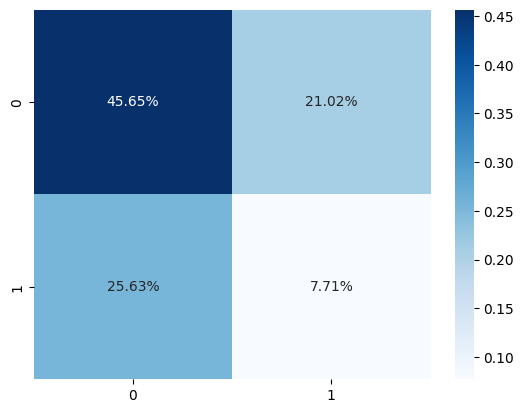

In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_true, y_preds))
cf_matrix = confusion_matrix(y_true, y_preds)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')